In [1]:
#importing the Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the Dataset
dataset = pd.read_csv('/content/insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
indep=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dep=dataset['charges']

In [7]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 0.20, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'criterion': ['squared_error'],
    'splitter': ['best'],
    'max_depth': [None, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 10, 20],
}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, refit = True, verbose = 3 ,n_jobs=-1, cv=2)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 2 folds for each of 175 candidates, totalling 350 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [None, 5, 10, 15, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'splitter': ['best']},
             verbose=3)

In [12]:
# Assuming 'grid' is your GridSearchCV object that has been fitted to the data
best_model = grid.best_estimator_

In [13]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

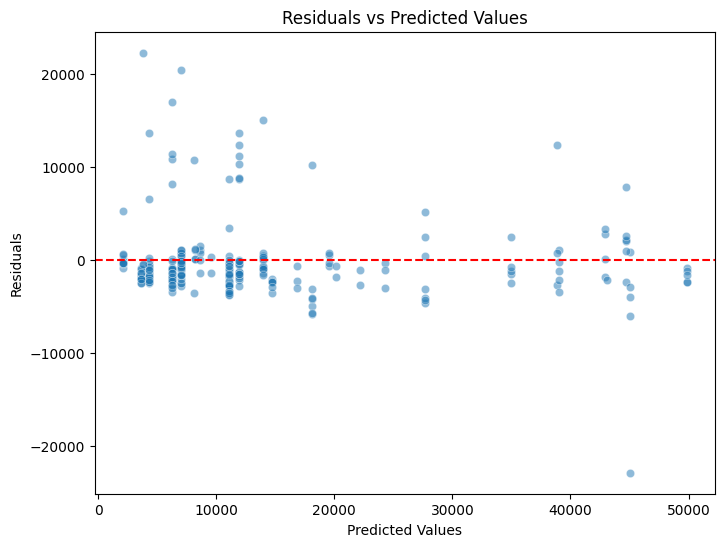

In [14]:
# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

# Assuming 'grid' is your GridSearchCV object and has been fitted to the data
print("Best parameters:", grid.best_params_)

# Access the mean test score for the best parameters
best_index = grid.best_index_
best_r2_score = grid.cv_results_['mean_test_score'][best_index]
# Printing the best R² score
print("r2:",best_r2_score)

Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
r2: 0.8318317329856825


In [16]:
table=pd.DataFrame.from_dict(grid.cv_results_)

In [17]:
table.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
40,0.002256,1.180172e-05,0.001223,0.000011,squared_error,5,10,2,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.834928,0.828735,0.831832,0.003097,1
41,0.002319,3.266335e-05,0.001246,0.000019,squared_error,5,10,5,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.834928,0.828735,0.831832,0.003097,1
42,0.002250,1.287460e-05,0.001175,0.000032,squared_error,5,10,10,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.834928,0.828735,0.831832,0.003097,1
43,0.002181,2.491474e-05,0.001224,0.000005,squared_error,5,10,20,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.834928,0.828735,0.831832,0.003097,1
48,0.002267,1.561642e-04,0.001239,0.000012,squared_error,5,20,20,best,"{'criterion': 'squared_error', 'max_depth': 5,...",0.836201,0.827203,0.831702,0.004499,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.004141,6.198883e-05,0.001322,0.000034,squared_error,15,1,2,best,"{'criterion': 'squared_error', 'max_depth': 15...",0.637013,0.669599,0.653306,0.016293,171
0,0.006148,5.393028e-04,0.001716,0.000072,squared_error,None,1,2,best,"{'criterion': 'squared_error', 'max_depth': No...",0.617627,0.688960,0.653293,0.035666,172
150,0.004247,1.192093e-07,0.001279,0.000014,squared_error,50,1,2,best,"{'criterion': 'squared_error', 'max_depth': 50...",0.625956,0.678137,0.652046,0.026090,173
100,0.006057,1.815319e-03,0.001256,0.000053,squared_error,20,1,2,best,"{'criterion': 'squared_error', 'max_depth': 20...",0.614574,0.665745,0.640160,0.025586,174


In [20]:
import pickle
filename="/content/RF_G.sav"
pickle.dump(best_model,open(filename,'wb'))